<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/KNN/codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from plotly import data 

In [ ]:
iris = data.iris()

In [ ]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
58,6.6,2.9,4.6,1.3,versicolor,2
83,6.0,2.7,5.1,1.6,versicolor,2
104,6.5,3.0,5.8,2.2,virginica,3
100,6.3,3.3,6.0,2.5,virginica,3
40,5.0,3.5,1.3,0.3,setosa,1


In [ ]:
X = iris.drop(['species','species_id'],axis=1)

In [ ]:
Y = iris['species_id']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [ ]:
class KNN() :
  def __init__(self, k=3) :
    self.k = k
  def fit(self,X,Y) :
    self.X_train =X
    self.Y_train =Y
  def distance(self,a,b) :
    return np.sqrt(((a-b)**2).sum())
  def label(self,x) :
    dist = np.zeros(self.X_train.shape[0])
    for i, z  in enumerate(self.X_train.values) :
      dist[i] = self.distance(z,x)
    idx = dist.argsort()
    idx = idx[:self.k]
    lab = self.Y_train.iloc[idx]
    label,counts = np.unique(lab,return_counts=True)
    return label[counts.argmax()]

  def predict(self,X_test) :
    y_pred = np.full(X_test.shape[0],self.Y_train.iloc[0])
    for i, x in enumerate(X_test.values) :
      y_pred[i] =self.label(x)
    
    return y_pred




In [ ]:
model = KNN()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,model.predict(x_test))

0.9736842105263158

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors = 5)
skmodel.fit(x_train,y_train)
accuracy_score(y_test,skmodel.predict(x_test))

0.9473684210526315

In [ ]:
import numpy as np

In [ ]:
train=  []
test = []
for i in range(1,20) :
  skmodel = KNeighborsClassifier(n_neighbors = i)
  skmodel.fit(x_train,y_train)
  test.append(accuracy_score(y_test,skmodel.predict(x_test)))
  train.append(accuracy_score(y_train,skmodel.predict(x_train)))


In [ ]:
train=  []
test = []
for i in range(1,20) :
  skmodel = KNN(k = i)
  skmodel.fit(x_train,y_train)
  test.append(accuracy_score(y_test,skmodel.predict(x_test)))
  train.append(accuracy_score(y_train,skmodel.predict(x_train)))

In [ ]:
import matplotlib.pyplot as plt

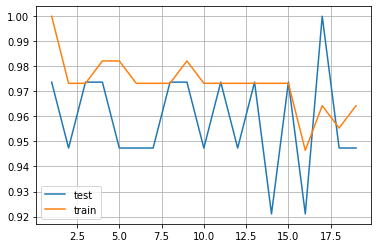

In [ ]:
plt.plot(np.arange(1,20),test,label ='test')
plt.plot(np.arange(1,20),train,label = 'train')
plt.legend()
plt.grid()